In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

# LAB 1

## Creation of the graph (without occupancy)

In [2]:
nodes = pd.read_csv('Documentation/nodes.csv', header=None, index_col=0, names=["Node","x_position","y_position"])
edges = pd.read_csv('Documentation/links.csv', header=None, names=[
    "Link ID", 
    "Length (m)",
    "Number of lanes", 
    "Starting node ID",
    "Ending node ID", 
    "Region"], index_col=0)
print(nodes.head(5),"\n", edges.head(5))

      x_position  y_position
Node                        
1         429948     4581385
2         431582     4580937
3         432524     4583069
4         432650     4582536
5         432645     4582410 
          Length (m)  Number of lanes  Starting node ID  Ending node ID  Region
Link ID                                                                       
512      109.223913                3             21109           19069       4
513      129.668254                3             19067           21109       4
514      133.572478                2             19065           21042       4
516       47.649608                2                11           19201       3
593       96.553539                3             18703              84       4


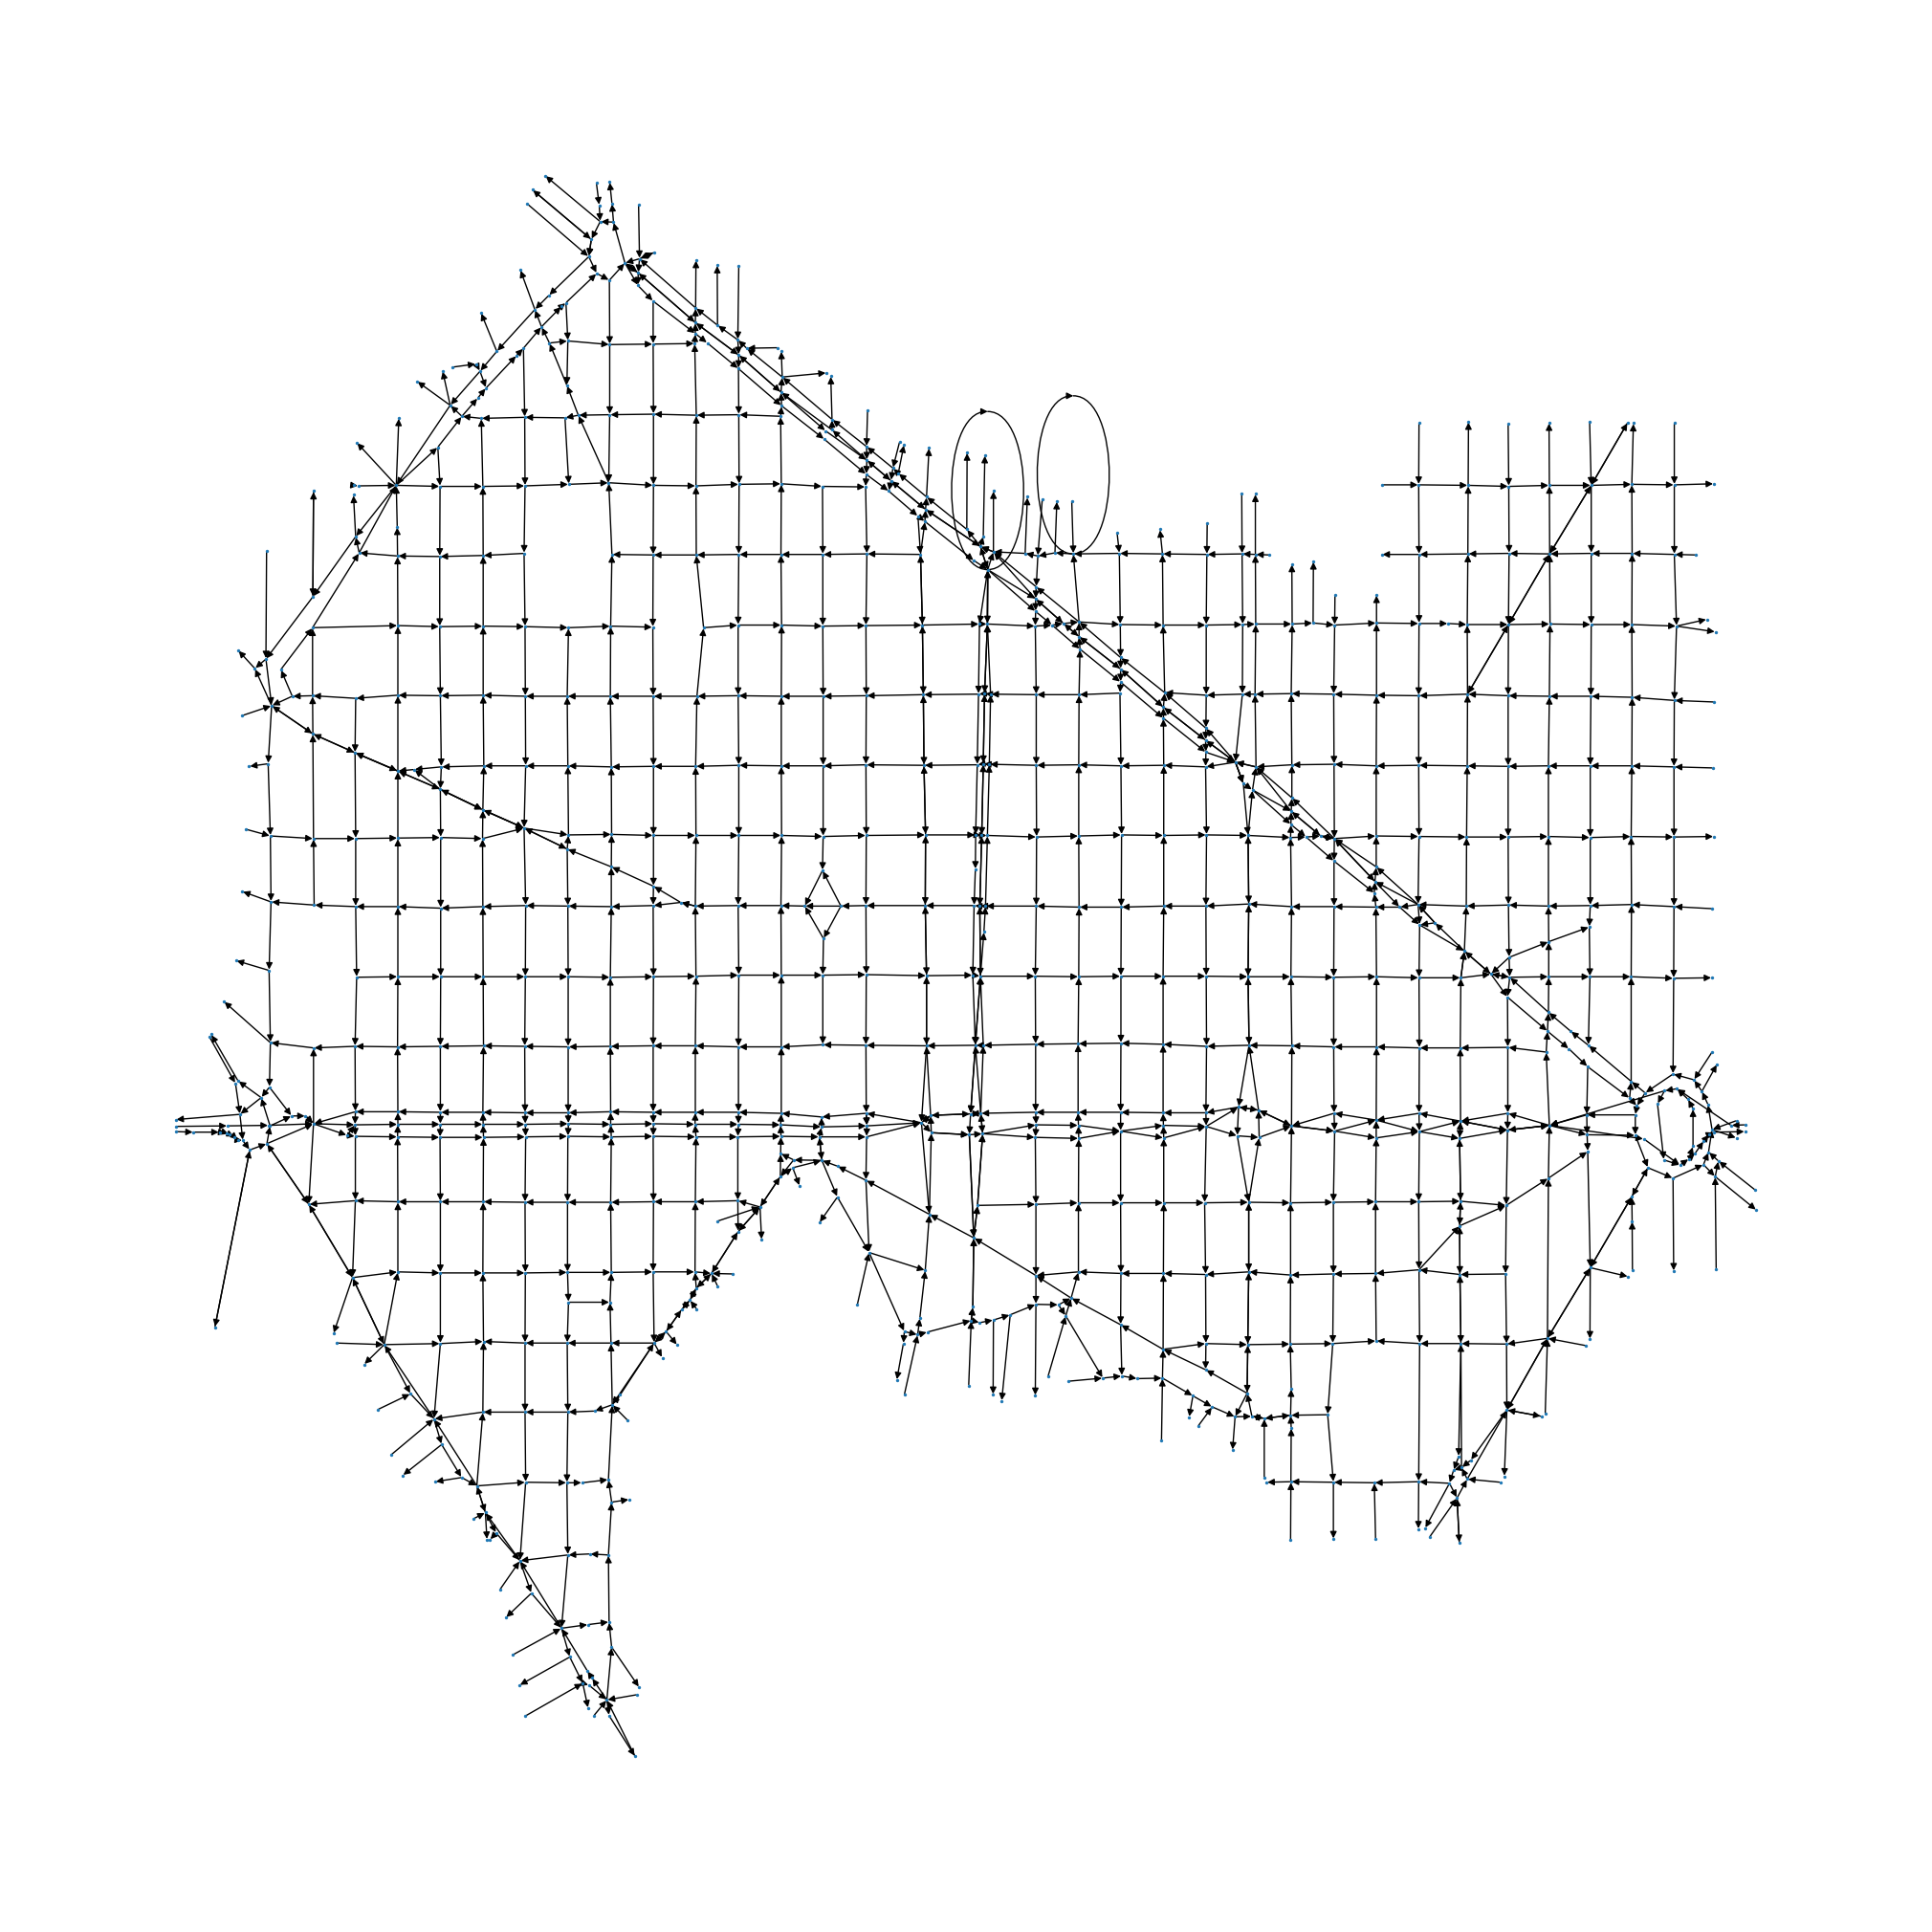

In [3]:
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)
plt.figure(figsize=(20,20))
nx.draw(G, node_size = 2, pos=nodes.transpose())
plt.show()

## Adding occupancy

In [4]:
occupancy = pd.read_csv('Documentation/occupancy.csv', index_col = 0)



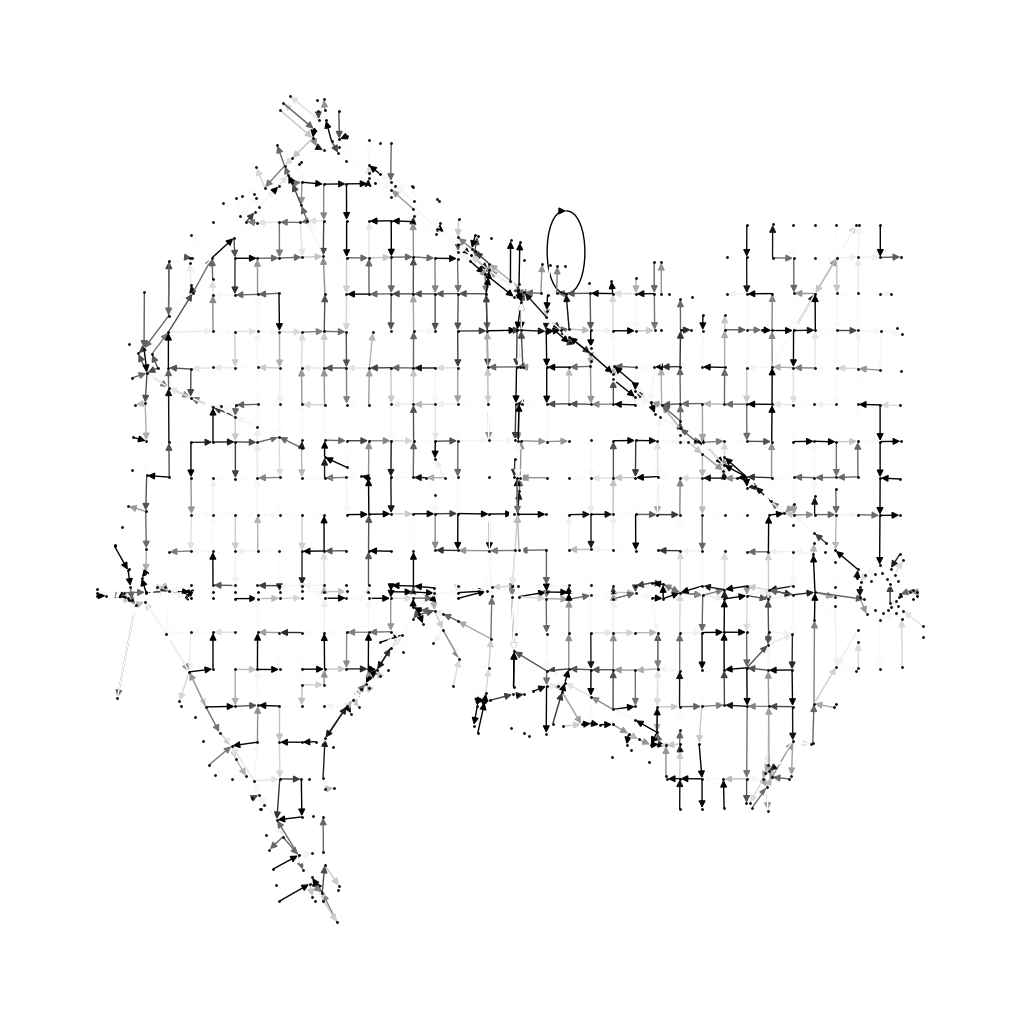

In [5]:
time_in_minutes = 120
time = time_in_minutes * 60
occupancy_at_t = occupancy.loc[time]
occupancy_at_t.name = f"Occupancy at time {time}"

plt.figure(figsize=(10,10))
nx.draw(G, node_size = 1, node_color="k", pos=nodes.transpose(), edge_cmap=mpl.colormaps["Greys"], edge_color=occupancy_at_t)
plt.show()

## Brol

In [6]:
H = nx.Graph()

In [7]:
a = np.array(G.nodes)
a.sort()

In [8]:
nodes.transpose().to_dict()

{1: {'x_position': 429948, 'y_position': 4581385},
 2: {'x_position': 431582, 'y_position': 4580937},
 3: {'x_position': 432524, 'y_position': 4583069},
 4: {'x_position': 432650, 'y_position': 4582536},
 5: {'x_position': 432645, 'y_position': 4582410},
 6: {'x_position': 428085, 'y_position': 4582825},
 7: {'x_position': 429247, 'y_position': 4580521},
 8: {'x_position': 431601, 'y_position': 4582951},
 9: {'x_position': 431314, 'y_position': 4580934},
 10: {'x_position': 430096, 'y_position': 4581212},
 11: {'x_position': 432591, 'y_position': 4582817},
 12: {'x_position': 430549, 'y_position': 4581247},
 13: {'x_position': 430613, 'y_position': 4581238},
 14: {'x_position': 429117, 'y_position': 4580599},
 15: {'x_position': 432747, 'y_position': 4581728},
 16: {'x_position': 428923, 'y_position': 4583515},
 17: {'x_position': 431231, 'y_position': 4581054},
 18: {'x_position': 429253, 'y_position': 4580639},
 19: {'x_position': 431752, 'y_position': 4580940},
 20: {'x_position': 4

In [9]:
len(G.edges)

1570

In [10]:
print(occupancy)

           512        513        514         516        593       594  595  \
0                                                                            
90    0.000000   0.318851   0.000000    4.498925   0.000000  2.558253    0   
180   0.000000   0.954632   0.689668    2.758188   0.000000  3.160290    0   
270   1.467929   2.044361   1.777651    2.653984   2.062903  3.084929    0   
360   3.901444   2.449490   3.395587    2.203485   5.054119  3.337283    0   
450   3.104570   1.904677   6.112496    5.337937   6.093624  2.410011    0   
...        ...        ...        ...         ...        ...       ...  ...   
6840  1.434303   8.809766  37.979273   95.631610  11.037785  5.581527    0   
6930  1.893379   6.196733  65.186992  100.000000   9.942805  6.036213    0   
7020  0.883639   4.366954  76.895563   99.889194   9.251026  5.806009    0   
7110  1.118334  42.137753  61.496904   83.768938  11.439867  5.269974    0   
7200  2.591139  66.666667  99.505577   94.755297   9.022585  3.7

In [11]:
## Point 2

(80, 1570)
(80,)


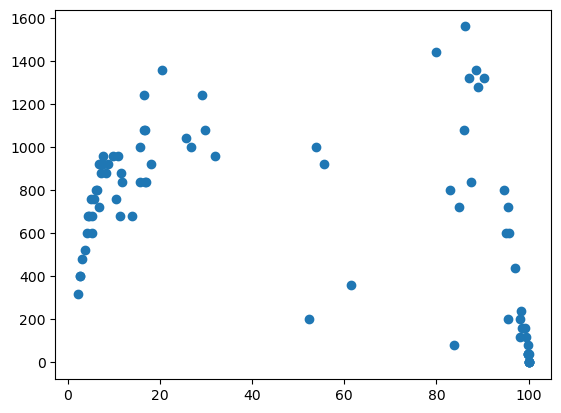

In [12]:
flow = pd.read_csv('Documentation/flow.csv', index_col = 0)

number_link = 516
flow_l = flow.loc[:, f'{number_link}']*3600/90
occpuancy_single_road = occupancy.loc[:, f'{number_link}']

print(flow.shape)
print(occpuancy_single_road.shape)

plt.scatter(occpuancy_single_road, flow_l)
plt.show()


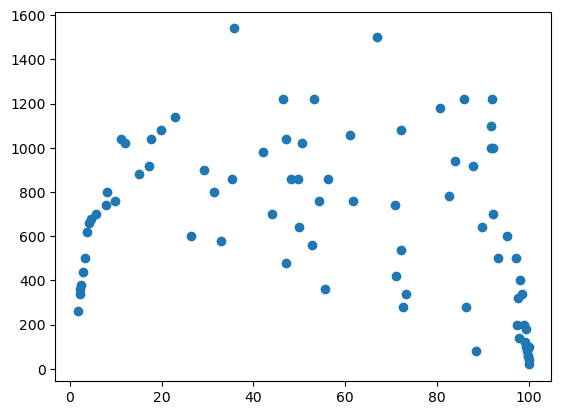

In [13]:
number_link = [516, 514]

        
flow_l= flow[[f'{number_link[0]}', f'{number_link[1]}']]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[[f'{number_link[0]}', f'{number_link[1]}']]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean)   
    
plt.show()

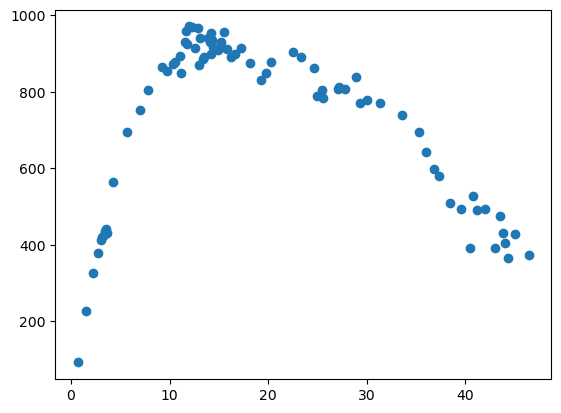

In [14]:
region = 1

number_link = []

for index in edges.index:
    if edges.loc[index]["Region"] == region:
        number_link.append(str(index))
       
flow_l= flow[number_link]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[number_link]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean)   
    
plt.show()

In [ ]:
#Step 3

length_lane [[ 47.649608  77.024545 102.524353 ... 127.289379 105.573071 113.224568]
 [ 47.649608  77.024545 102.524353 ... 127.289379 105.573071 113.224568]
 [ 47.649608  77.024545 102.524353 ... 127.289379 105.573071 113.224568]
 ...
 [ 47.649608  77.024545 102.524353 ... 127.289379 105.573071 113.224568]
 [ 47.649608  77.024545 102.524353 ... 127.289379 105.573071 113.224568]
 [ 47.649608  77.024545 102.524353 ... 127.289379 105.573071 113.224568]] (204, 204)
mean_speed [30.11045531 23.17137157 19.36829642 21.91461645 23.8943725  25.04213131
 25.07678294 21.50871266 21.21255844 20.55639245 21.7889488  17.29728119
 17.58697977 16.88280435 13.98925068 15.41565305 12.67323622 10.20676895
 10.39652237  9.59092348 10.13277336 12.42647197 13.05986516 13.57190586
 12.51487555 10.18980601 10.57454002 10.18512324  9.11031458  9.08139786
  9.59706638  9.02461179  9.53689673  9.3754513   9.24462869  9.11741017
  8.82105185  9.37032248  8.7456655   8.42804718  8.69689599  6.55841665
  6.0260848

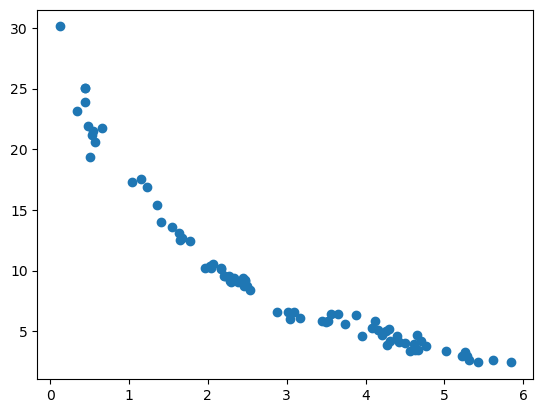

In [224]:
region = 3

number_link_int = []
number_link_str = []

L = 5
Ld = 2

for index in edges.index:
    if edges.loc[index]["Region"] == region:
        number_link_int.append(int(index))
        number_link_str.append(str(index))

number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()
#print(length_lane.shape)

occupancy_region = occupancy[number_link_str].to_numpy()

number_lane = np.tile(number_lane, (number_lane.shape[0], 1))

#print('occupancy_region', occupancy_region, occupancy_region.shape)
#print('number_lane', number_lane, number_lane.shape)

density = occupancy_region@np.transpose(1/number_lane)/100/(Ld + L)
#print(1/number_lane)


flow_region = flow[number_link_str].to_numpy()

#print('flow',flow_region, flow_region.shape)
#print('np.reciprocal(density)',np.reciprocal(density), dT.shape)

link_speed = flow_region@np.transpose(density)
#link_speed = np.multiply(np.reciprocal(density, flow_region))

#print(link_speed.shape)
#print('density', density.shape)

length_lane = np.tile(length_lane, (length_lane.shape[0], 1))
print('length_lane', length_lane, length_lane.shape)

mean_speed = np.mean(flow_region@length_lane, axis=1)/np.mean(density@length_lane, axis=1)

print('mean_speed', mean_speed, mean_speed.shape)
average_density = np.mean(density, axis=1)

plt.scatter(average_density, mean_speed)   
   
    
plt.show()